In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import libmr
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
from PIL import Image
import seaborn as sns
from PIL.ExifTags import TAGS, GPSTAGS
from urllib import request
from io import BytesIO
%matplotlib inline 

In [8]:
# npz files are generated when running train.py with either -t or -tt
landmark_logits = np.load('logits/1213.npz')

In [9]:
# they contain a dictionary with landmarks -> np.array of 14951 items (logit values)
n_ids = len(landmark_logits.keys())
print(n_ids)
c_cats = 14951

625


In [4]:
# pick top 2 predicted landmarks and store its logits for each prediction
# note though some predictions may be wrong
logits = np.empty((n_ids,2))
for i, (k,_logits) in enumerate(landmark_logits.items()):
    order = np.argsort(_logits)
    logits[i,0] = _logits[order[-1]]
    logits[i,1] = _logits[order[-2]]

In [5]:
np.argsort(logits)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

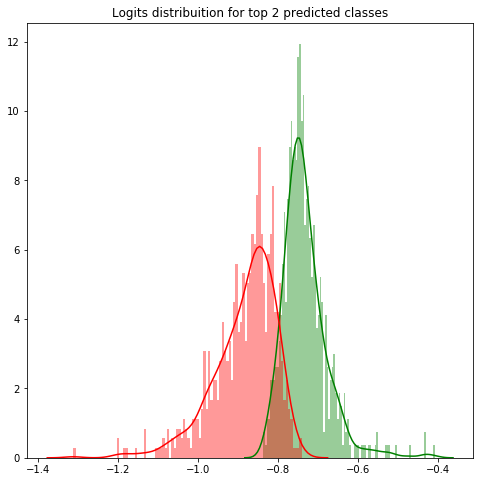

In [7]:
plt.figure(figsize = (8, 8))
plt.title('Logits distribuition for top 2 predicted classes')
sns.distplot(logits[:,0],color='green', kde=True,bins=100)
sns.distplot(logits[:,1],color='red', kde=True,bins=100)
plt.show()